<a href="https://colab.research.google.com/github/Yazan-Daibes/Arabic-Toxic-Comment-Classification/blob/main/traditional_algorithms_with_one_mean_and_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install dependencies

In [ ]:
!pip install transformers
!pip install --upgrade transformers
!git clone https://github.com/aub-mind/arabert
!pip install -r arabert/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 110.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Cloning into 'arabert'...
remote: Enumerating objects: 600, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 600 (delta 38), reused 45 (delta 30), pack-reused 535
Receiving objects: 100% (600/600), 9.14 MiB | 24.07 MiB/s, done.
Resolving deltas: 100% (339/339), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.

# Imports

In [ ]:
from transformers import AutoTokenizer, AutoModel
from arabert.preprocess import ArabertPreprocessor
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn import ensemble

# Initialize Model, Tokenizer and preprocessor

In [ ]:
#aubmindlab/bert-base-arabertv2
model_name = "aubmindlab/bert-large-arabertv2"
arabert_prep = ArabertPreprocessor(model_name=model_name)
model = AutoModel.from_pretrained(model_name)
model.eval()
tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.8/dist-packages/urllib3/connectionpool.py:842: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn((


100%|██████████| 241M/241M [00:35<00:00, 6.83MiB/s]


[2023-02-27 12:26:04,000 - farasapy_logger - WARNING]: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.


Some weights of the model checkpoint at aubmindlab/bert-large-arabertv2 were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
import torch

if torch.cuda.is_available():       
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: Tesla T4


# **Attributes to Change**

In [ ]:
number = 126

In [ ]:
data_filename = 'allData.csv'

# embeddings_config = {"is_embeddings_ready":True, "embeddings_filename":"allData_Embeddings_k_means.csv"}
embeddings_config = {"is_embeddings_ready":True, "embeddings_filename":"allData_Embeddings_arithmetic_mean.csv"}
# embeddings_config = {"is_embeddings_ready":False, "mean_type":"arithmetic_mean"}
# embeddings_config = {"is_embeddings_ready":False, "mean_type":"k_means"}





# labels = {"normal":"0","abusive":"1","hate":"2", "obscene":"3"}
# class_type = 'label'

labels = {"normal":"0","abusive":"1","hate":"2"}
class_type = 'label'

# labels = {"normal":"0","low_abusive":"1","high_abusive":"2","low_hate":"3", "high_hate":"4", "high_obscene":"5"}
# class_type = 'label_with_label'

# labels = {"low":"0","high":"1"}
# class_type = 'level'

# labels = {"toxic":"0","non-toxic":"1"}
# class_type = 'label'



test_data_percentage=0.1
# test_data_percentage=0.2
# test_data_percentage=0.3



n_pca_components=3

In [ ]:
class clust():
  def get_embeddings(self, index, sklearn_load_ds, mean_type = "arithmetic_mean"):
    global dropped_sentences_count
    print(arabert_prep.preprocess(sklearn_load_ds.loc[index, "Sentence"]))

    inputs = tokenizer.encode_plus(arabert_prep.preprocess(sklearn_load_ds.loc[index, "Sentence"]), return_tensors='pt')
    outputs = model(**inputs)
    embeddings = outputs['last_hidden_state']
    embeddings_text_only = outputs['last_hidden_state'][0][1:-1]
    embeddings_text_only = embeddings_text_only.detach().numpy()

    if mean_type == "arithmetic_mean":
      return sklearn_load_ds, list(np.mean(embeddings_text_only, axis=0))

    embeddings_text_only = pd.DataFrame(embeddings_text_only.T)
    if embeddings_text_only.empty:
      dropped_sentences_count = dropped_sentences_count+1
      print("Empty Comment | dropped_sentences_count: " + str(dropped_sentences_count))
      sklearn_load_ds = sklearn_load_ds.drop(index)
      return sklearn_load_ds, [-1]

    # Scaling the data to keep the different attributes in same range.
    embeddings_text_only[pd.DataFrame(embeddings_text_only).columns] = StandardScaler().fit_transform(embeddings_text_only)

    if(len(embeddings_text_only.columns) < n_pca_components):
      dropped_sentences_count = dropped_sentences_count+1
      print("Can't Cluster | dropped_sentences_count: " + str(dropped_sentences_count))
      sklearn_load_ds = sklearn_load_ds.drop(index)
      return sklearn_load_ds, [-1]
    else:
      pca_2 = PCA(n_components=n_pca_components)
      pca_2_result = pca_2.fit_transform(embeddings_text_only)
      # print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))
      # >> Explained variation per principal component: [0.36198848 0.1920749 ]
      # print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))
      # >> Cumulative variance explained by 2 principal components: 55.41%
      # Results from pca.components_
      dataset_pca = pd.DataFrame(abs(pca_2.components_), columns=embeddings_text_only.columns)

    clf = KMeans(n_clusters=3, random_state=42)
    clf.fit(embeddings_text_only)
    return sklearn_load_ds, clf.labels_

  def _load_data(self, sklearn_load_ds, embeddings_config):
    global dropped_sentences_count
    global i
    if embeddings_config["is_embeddings_ready"]:
      my_df = pd.read_csv(embeddings_config["embeddings_filename"], header=None)
    else:
      X = []
      f = open(data_filename[:-4] + '_Embeddings_' + embeddings_config["mean_type"] + '.csv', "a")
      f.truncate(0)
      f.close()
      for record in sklearn_load_ds.index:
        sklearn_load_ds, emb = self.get_embeddings(record, sklearn_load_ds, mean_type=embeddings_config["mean_type"])
        if len(emb) == 1:
          print("***************************")
          continue
        with open(data_filename[:-4] + '_Embeddings_' + embeddings_config["mean_type"] + '.csv', 'a', newline='') as file:
          writer = csv.writer(file)
          writer.writerow(emb)
          sklearn_load_ds.to_csv(data_filename, index=False)
          X.append(emb)
          print(str(record) + " | " + "# of embeddings: " + str(len(X[record-dropped_sentences_count])))
          print("***************************")
      X = np.nan_to_num(X)
      my_df = pd.DataFrame(X)
    self.features = my_df
    self.labels = sklearn_load_ds["Class"]
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(my_df, sklearn_load_ds["Class"], test_size=test_data_percentage,
                                                                                  random_state=42)

  def __init__(self, sklearn_load_ds, embeddings_config={"is_embeddings_ready":False, "mean_type":"arithmetic"}):
    self._load_data(sklearn_load_ds, embeddings_config)

  def print_predictions(self, predictions):
    for i in range(0,len(predictions)):
      print(self.X_test[i] + " : " + list(labels.keys())[list(labels.values()).index(predictions[i])])

  def classify(self, model=LogisticRegression(random_state=42), print_predict= False):
    global number

    if isinstance(model, MultinomialNB):
      # For solving negative values
      scaler = MinMaxScaler()
      self.X_train = scaler.fit_transform(self.X_train)
      self.X_test = scaler.transform(self.X_test)

    # for using TF-IDF Features:
    # model = Pipeline([('vect', CountVectorizer(lowercase=False)),('tfidf', TfidfTransformer()),('clf', model),])

    model.fit(self.X_train, self.y_train)
    y_pred = model.predict(self.X_test)
    print('Accuracy: {}'.format(accuracy_score(self.y_test, y_pred)))
    print(classification_report(self.y_test.astype(y_pred.dtype), y_pred))
    confusion_matrix = metrics.confusion_matrix(self.y_test.astype(y_pred.dtype), y_pred)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = labels.keys())
    cm_display.plot()
    plt.savefig(str(number) + '.png')
    number = number + 1
    plt.show()


    # score = cross_val_score(model,self.features, self.labels, cv=5, scoring='accuracy')
    # print(f'Scores for each fold are: {score}')
    # print(f'Average score: {"{:.2f}".format(score.mean())}')

    # if isinstance(model, RandomForestClassifier):
    #   score = cross_val_score(ensemble.RandomForestClassifier(random_state=42),self.features, self.labels, cv=5, scoring='accuracy')
    #   print(f'Scores for each fold are: {score}')
    #   print(f'Average score: {"{:.2f}".format(score.mean())}')


    if print_predict:
      self.print_predictions(y_pred)

In [ ]:
# dropped_sentences_count = 0
# i = 0
# for i in range(7, 16):
#   dropped_sentences_count = 0
#   data = pd.read_csv('data_chunks/chunk' + str(i) + '.csv')
#   data_loaded = clust(data)

In [ ]:
dropped_sentences_count = 0
data = pd.read_csv(data_filename)
data.rename(columns={'comment': 'Sentence', class_type: 'Class'}, inplace=True)
if 'obscene' not in labels:
  print("CONVERT **obscene** to **abusive**")
  data['Class'] = data['Class'].replace(['obscene'], 'abusive')
if labels == {"toxic":"0","non-toxic":"1"}:
  data['Class'] = data['Class'].replace(['obscene', 'abusive', 'hate'], 'toxic')
  data['Class'] = data['Class'].replace(['normal'], 'non-toxic')
data["Class"].replace(labels,inplace=True)

CONVERT **obscene** to **abusive**


In [ ]:
data_loaded = clust(data, embeddings_config)

In [ ]:
# from google.colab import drive
# import shutil

# if not embeddings_config["is_embeddings_ready"]:
#   drive.mount('/content/drive')
#   colab_link = "/content/" + data_filename[:-4] + "_Embeddings_" + embeddings_config["mean_type"] + ".csv"
#   gdrive_link = "/content/drive/MyDrive/"
#   shutil.copy(colab_link, gdrive_link)

# **Random Forest**

Accuracy: 0.9037844772289929
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       801
           1       0.91      0.87      0.89       597
           2       0.93      0.71      0.81       161

    accuracy                           0.90      1559
   macro avg       0.91      0.85      0.88      1559
weighted avg       0.91      0.90      0.90      1559



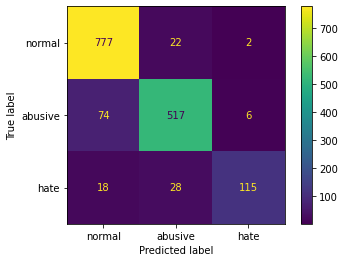

In [ ]:
data_loaded.classify(RandomForestClassifier())

# **Decision Tree**

Accuracy: 0.8556767158434894
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       801
           1       0.88      0.81      0.84       597
           2       0.67      0.73      0.70       161

    accuracy                           0.86      1559
   macro avg       0.81      0.82      0.81      1559
weighted avg       0.86      0.86      0.86      1559



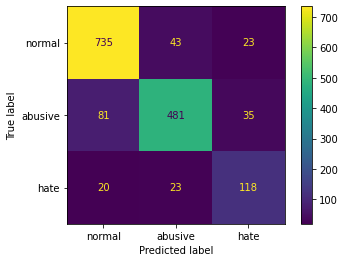

In [ ]:
data_loaded.classify(DecisionTreeClassifier())

# **SVC**

In [ ]:
data_loaded.classify(model=SVC(probability=True))

KeyboardInterrupt: ignored

# **Naive Bayes**

In [ ]:
data_loaded.classify(MultinomialNB(alpha=1.8))

# **Linear SVC**

In [ ]:
data_loaded.classify(LinearSVC())

# **Logistic Regression**

In [ ]:
data_loaded.classify()